In [1]:
import torch
import cv2
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
import torchvision

import matplotlib.pyplot as plt

In [2]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT)

In [3]:
im_raw= cv2.imread("cat.png")
im_np = im_raw.copy()
im_raw.shape

(851, 1280, 3)

In [4]:
im_raw = torch.from_numpy(im_raw).type(torch.float32)
im = im_raw.permute(2, 0, 1)
im.shape

torch.Size([3, 851, 1280])

In [5]:
X = im.float()
X

tensor([[[168., 168., 168.,  ..., 252., 252., 252.],
         [168., 168., 168.,  ..., 252., 252., 252.],
         [168., 168., 168.,  ..., 252., 252., 252.],
         ...,
         [102., 106., 107.,  ..., 232., 232., 232.],
         [101., 105., 105.,  ..., 232., 232., 232.],
         [ 99., 102., 102.,  ..., 232., 232., 232.]],

        [[195., 195., 195.,  ..., 251., 251., 251.],
         [195., 195., 195.,  ..., 251., 251., 251.],
         [195., 195., 195.,  ..., 251., 251., 251.],
         ...,
         [129., 133., 134.,  ..., 233., 233., 233.],
         [128., 132., 132.,  ..., 233., 233., 233.],
         [126., 129., 129.,  ..., 233., 233., 233.]],

        [[230., 230., 230.,  ..., 252., 252., 252.],
         [230., 230., 230.,  ..., 252., 252., 252.],
         [230., 230., 230.,  ..., 252., 252., 252.],
         ...,
         [198., 201., 202.,  ..., 244., 244., 244.],
         [197., 200., 200.,  ..., 244., 244., 244.],
         [194., 198., 198.,  ..., 244., 244., 244.]]]

In [6]:
Xmin = torch.min(X)
Xmax = torch.max(X)

X = X - Xmin
X = X / Xmax
X

tensor([[[0.6588, 0.6588, 0.6588,  ..., 0.9882, 0.9882, 0.9882],
         [0.6588, 0.6588, 0.6588,  ..., 0.9882, 0.9882, 0.9882],
         [0.6588, 0.6588, 0.6588,  ..., 0.9882, 0.9882, 0.9882],
         ...,
         [0.4000, 0.4157, 0.4196,  ..., 0.9098, 0.9098, 0.9098],
         [0.3961, 0.4118, 0.4118,  ..., 0.9098, 0.9098, 0.9098],
         [0.3882, 0.4000, 0.4000,  ..., 0.9098, 0.9098, 0.9098]],

        [[0.7647, 0.7647, 0.7647,  ..., 0.9843, 0.9843, 0.9843],
         [0.7647, 0.7647, 0.7647,  ..., 0.9843, 0.9843, 0.9843],
         [0.7647, 0.7647, 0.7647,  ..., 0.9843, 0.9843, 0.9843],
         ...,
         [0.5059, 0.5216, 0.5255,  ..., 0.9137, 0.9137, 0.9137],
         [0.5020, 0.5176, 0.5176,  ..., 0.9137, 0.9137, 0.9137],
         [0.4941, 0.5059, 0.5059,  ..., 0.9137, 0.9137, 0.9137]],

        [[0.9020, 0.9020, 0.9020,  ..., 0.9882, 0.9882, 0.9882],
         [0.9020, 0.9020, 0.9020,  ..., 0.9882, 0.9882, 0.9882],
         [0.9020, 0.9020, 0.9020,  ..., 0.9882, 0.9882, 0.

In [7]:
model.eval()
predictions=model([X])
predictions

[{'boxes': tensor([[  37.3539,   35.7803,  806.2959,  784.1462],
          [   0.0000,  549.9099, 1000.8953,  840.3461],
          [  46.8947,  368.2122,  981.7389,  804.1888],
          [ 154.1469,   33.5405,  617.8054,  575.0652],
          [   0.0000,   67.2076, 1145.0081,  851.0000],
          [   0.0000,  546.7827,  979.8828,  841.7066]],
         grad_fn=<StackBackward0>),
  'labels': tensor([17, 65, 17, 17, 65, 63]),
  'scores': tensor([0.9801, 0.6205, 0.4151, 0.1506, 0.1031, 0.0692],
         grad_fn=<IndexBackward0>),
  'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
  
  
          [[[0.0000, 0.00

In [8]:
output_masks = predictions[0]["masks"]
output_masks, output_masks.shape

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [9]:
output_masks[0], output_masks[0].shape

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]], grad_fn=<SelectBackward0>),
 torch.Size([1, 851, 1280]))

In [10]:
with torch.inference_mode():
    mask_0 = output_masks[0].permute(1,2,0)
    mask_1 = output_masks[1].permute(1,2,0)

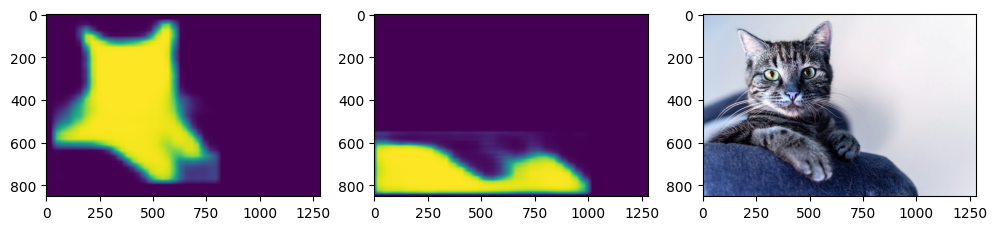

In [11]:
with torch.inference_mode():
    plt.figure(figsize=(12,10))
    plt.subplot(1,3,1)
    plt.imshow(mask_0)
    plt.subplot(1,3,2)
    plt.imshow(mask_1)
    plt.subplot(1,3,3)
    plt.imshow(im_np)
    

In [12]:
mask_0, mask_0.shape

(tensor([[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]], requires_grad=True),
 torch.Size([851, 1280, 1]))

In [13]:
final_mask = mask_0 * Xmax
final_mask = final_mask + Xmin
final_mask = torch.round(final_mask)
final_mask, final_mask.shape

(tensor([[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]], grad_fn=<RoundBackward0>),
 torch.Size([851, 1280, 1]))

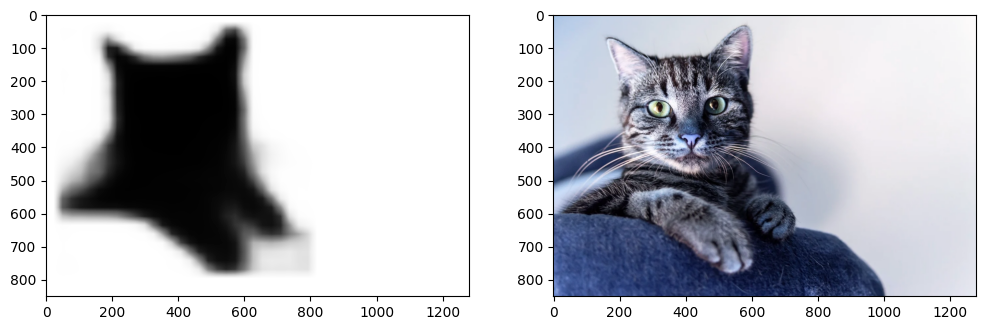

In [14]:
with torch.inference_mode():
    plt.figure(figsize=(12,10))
    plt.subplot(1,2,1)
    plt.imshow(final_mask, cmap="Grays")
    plt.subplot(1,2,2)
    plt.imshow(im_np)

In [15]:
im_raw = torch.from_numpy(im_np).float()

In [16]:
final_mask.shape, im_raw.shape

(torch.Size([851, 1280, 1]), torch.Size([851, 1280, 3]))

In [17]:
final_mask_permuted = final_mask.permute(2, 0, 1)
im_permuted = im_raw.permute(2, 0, 1)
final_mask_permuted.shape, im_permuted.shape

(torch.Size([1, 851, 1280]), torch.Size([3, 851, 1280]))

In [18]:
remove = (final_mask_permuted[0])-torch.min(final_mask_permuted[0])-30
remove = remove * 4
remove[remove<0] = 0

In [19]:
with torch.inference_mode():
    remove_np = remove.numpy()

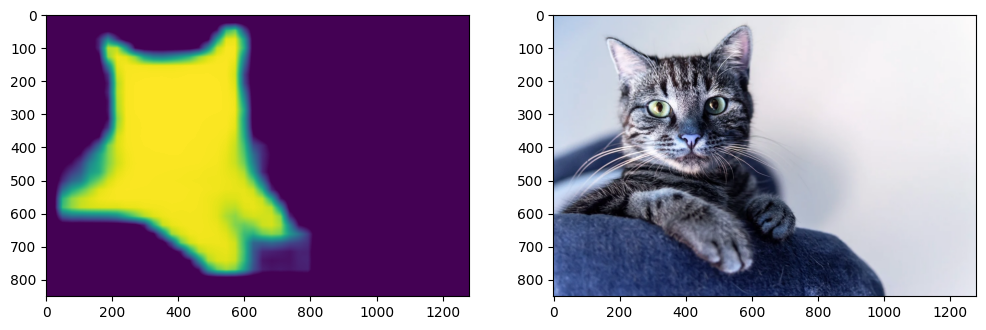

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(remove_np)
plt.subplot(1,2,2)
plt.imshow(im_np)
plt.show()

In [21]:
torch_image = torch.from_numpy(im_np).permute(2,0,1).type(torch.float32)
torch_mask = remove.type(torch.float32)

torch_image.shape, torch_image.dtype, torch_mask.dtype, torch_mask.shape

(torch.Size([3, 851, 1280]),
 torch.float32,
 torch.float32,
 torch.Size([851, 1280]))

In [22]:
resulting_image_tensor = torch_image
resulting_image_tensor[0] = resulting_image_tensor[0] + torch_mask
resulting_image_tensor[resulting_image_tensor>255] = 255

In [23]:
result_image = None
with torch.inference_mode():
    result_image = resulting_image_tensor.type(torch.uint8)
    result_image = result_image.permute(1, 2, 0).numpy()
im_np.shape, result_image.shape

((851, 1280, 3), (851, 1280, 3))

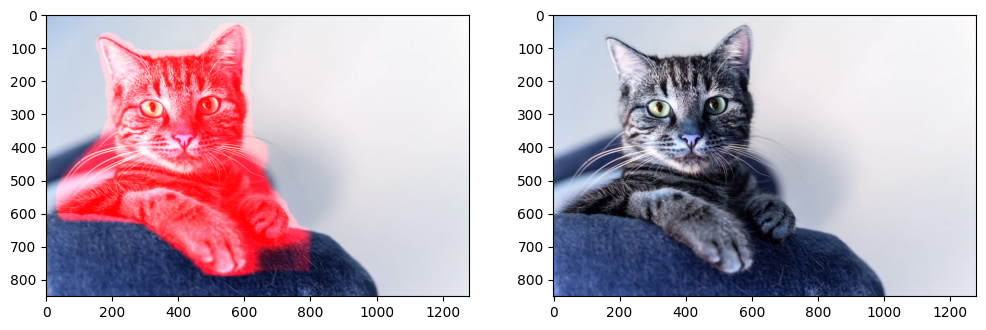

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(result_image)
plt.subplot(1,2,2)
plt.imshow(im_np)
plt.show()